In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats

In [ ]:
df = pd.read_csv("/content/The Influence of AI in E-Commerce.csv")

In [ ]:
df.head()


,Age Group,Gender,What is your highest level of education,What is your occupation status?,How often do you shop online?,"How familiar are you with AI features used in e-commerce platforms (e.g., chatbots, recommendations)?",Which of the following AI tools have you interacted with while shopping online? (Select all that apply),Have AI-generated product recommendations influenced your buying decisions?,Do you find AI-generated suggestions more helpful than browsing manually?,"Have urgency messages (e.g., ""Only 2 left in stock!"") influenced your purchase?",Do you think AI systems are capable of understanding your preferences accurately?,Do you feel comfortable with the amount of personal data AI systems collect about you?,Have you ever found AI-generated ads or suggestions to be intrusive or creepy?,"Do you believe AI in e-commerce is biased toward certain consumer groups (e.g., based on location, income, past behavior)?",Should companies be required to explain how their AI systems make decisions?,Do you trust AI more than human customer service in e-commerce platforms?,How do you feel about dynamic pricing (AI changing prices in real time)?,Do you think AI improves your overall satisfaction with online shopping?,Would you support regulations to ensure ethical AI usage in e-commerce?,What is your biggest concern about AI in e-commerce? (Select all that apply)
0,18–25,Male,Postgraduate,Student,Occasionally (once a month),Very familiar,Product recommendation engines,Occasionally,Agree,Occasionally,Somewhat accurately,Yes,Sometimes,Possibly,Not necessary,Yes,Acceptable if transparent,Agree,Somewhat support,Manipulative advertising
1,18–25,Male,Postgraduate,Student,Occasionally (once a month),Very familiar,Product recommendation engines;Chatbots/Virtua...,Frequently,Strongly agree,"Yes, many times","Yes, very accurately",Yes,Sometimes,"Yes, significantly","Yes, always",Yes,It’s fair and helpful,Strongly agree,Strongly support,Manipulative advertising
2,18–25,Female,Postgraduate,Student,Frequently (once a week or more),Very familiar,Product recommendation engines;Chatbots/Virtua...,Occasionally,Agree,"Yes, many times",Somewhat accurately,Yes,Never,Possibly,Not sure,Equally,Not aware of it,Agree,Not sure,Data privacy
3,18–25,Male,Postgraduate,Student,Occasionally (once a month),Very familiar,Product recommendation engines,Frequently,Strongly agree,Rarely,Somewhat accurately,Not really,Sometimes,Possibly,Only in sensitive cases,No,Acceptable if transparent,Agree,Somewhat support,Manipulative advertising
4,18–25,Female,Undergraduate,Student,Occasionally (once a month),Somewhat familiar,Chatbots/Virtual Assistants;Voice-based shoppi...,Rarely,Disagree,Never,Not really,Not really,Rarely,Unlikely,Only in sensitive cases,No,Acceptable if transparent,Agree,Somewhat support,Biased recommendations


In [ ]:
df.columns = df.columns.str.strip()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 20 columns):
 #   Column                                                                                                                      Non-Null Count  Dtype 
---  ------                                                                                                                      --------------  ----- 
 0   Age Group                                                                                                                   102 non-null    object
 1   Gender                                                                                                                      102 non-null    object
 2   What is your highest level of education                                                                                     102 non-null    object
 3   What is your occupation status?                                                                                             102 no

In [ ]:
X = [
    "How familiar are you with AI features used in e-commerce platforms (e.g., chatbots, recommendations)?",
    "Do you find AI-generated suggestions more helpful than browsing manually?",
    "Do you think AI systems are capable of understanding your preferences accurately?",
    "Do you think AI improves your overall satisfaction with online shopping?"
]
Y = "Have AI-generated product recommendations influenced your buying decisions?"

In [ ]:
for col in df.columns:
    print(repr(col))

'Age Group'
'Gender'
'What is your highest level of education'
'What is your occupation status?'
'How often do you shop online?'
'How familiar are you with AI features used in e-commerce platforms (e.g., chatbots, recommendations)?'
'Which of the following AI tools have you interacted with while shopping online? (Select all that apply)'
'Have AI-generated product recommendations influenced your buying decisions?'
'Do you find AI-generated suggestions more helpful than browsing manually?'
'Have urgency messages (e.g., "Only 2 left in stock!") influenced your purchase?'
'Do you think AI systems are capable of understanding your preferences accurately?'
'Do you feel comfortable with the amount of personal data AI systems collect about you?'
'Have you ever found AI-generated ads or suggestions to be intrusive or creepy?'
'Do you believe AI in e-commerce is biased toward certain consumer groups (e.g., based on location, income, past behavior)?'
'Should companies be required to explain how t

In [ ]:
analysis_df = df[X + [Y]].copy()

In [ ]:
likert_map = {
    "Strongly disagree": 1,
    "Disagree": 2,
    "Neutral": 3,
    "Agree": 4,
    "Strongly agree": 5,
    "Very familiar": 5,
    "Somewhat familiar": 3,
    "Not familiar": 1,
    "Frequently": 5,
    "Occasionally": 3,
    "Rarely": 2,
    "Never": 1,
    "Yes, very accurately": 5,
    "Somewhat accurately": 3,
    "Not really": 1,
    "Yes": 4, # Added for other 'Yes/No' type questions
    "No": 1,  # Added for other 'Yes/No' type questions
    "Possibly": 3,
    "Unlikely": 2,
    "Sometimes": 3,
    "Not sure": 3,
    "Equally": 3,
    "Acceptable if transparent": 4,
    "It’s fair and helpful": 5,
    "Not aware of it": 1,
    "Somewhat support": 3,
    "Strongly support": 5,
    "Not necessary": 1,
    "Only in sensitive cases": 3,
    "Yes, many times": 5 # Specific response for 'Have urgency messages influenced purchase?'
}

# Strip whitespace from string columns before applying the map
for col in analysis_df.columns:
    if analysis_df[col].dtype == 'object':
        analysis_df[col] = analysis_df[col].str.strip()

# Apply mapping column-wise and then explicitly convert to numeric
for col in analysis_df.columns:
    if analysis_df[col].dtype == 'object': # Only map if still object type
        analysis_df[col] = analysis_df[col].map(likert_map)
    # Explicitly convert to numeric, coercing any non-convertible values to NaN
    analysis_df[col] = pd.to_numeric(analysis_df[col], errors='coerce')

LIKERT MAP: This code converts different types of survey text responses into numerical values so that statistical analysis (correlation, regression, visualization) can be performed in Python.

In [ ]:
analysis_df.info()
analysis_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 5 columns):
 #   Column                                                                                                 Non-Null Count  Dtype  
---  ------                                                                                                 --------------  -----  
 0   How familiar are you with AI features used in e-commerce platforms (e.g., chatbots, recommendations)?  76 non-null     float64
 1   Do you find AI-generated suggestions more helpful than browsing manually?                              102 non-null    int64  
 2   Do you think AI systems are capable of understanding your preferences accurately?                      99 non-null     float64
 3   Do you think AI improves your overall satisfaction with online shopping?                               102 non-null    int64  
 4   Have AI-generated product recommendations influenced your buying decisions?                        

,"How familiar are you with AI features used in e-commerce platforms (e.g., chatbots, recommendations)?",Do you find AI-generated suggestions more helpful than browsing manually?,Do you think AI systems are capable of understanding your preferences accurately?,Do you think AI improves your overall satisfaction with online shopping?,Have AI-generated product recommendations influenced your buying decisions?
0,5.0,4,3.0,4,3
1,5.0,5,5.0,5,5
2,5.0,4,3.0,4,3
3,5.0,5,3.0,4,5
4,3.0,2,1.0,4,2


In [ ]:
analysis_df.columns = [
    "AI_Familiarity",
    "AI_Recommendation_Helpfulness",
    "AI_Preference_Accuracy",
    "AI_Satisfaction_Improvement",
    "Conversion_Influence"
]

In [ ]:
import numpy as np

print("NaN in X:", X_reg.isna().sum())
print("NaN in y:", y_reg.isna().sum())

print("Inf in X:", np.isinf(X_reg).sum())
print("Inf in y:", np.isinf(y_reg).sum())

NaN in X: const                             0
AI_Familiarity                   26
AI_Recommendation_Helpfulness     0
AI_Preference_Accuracy            3
AI_Satisfaction_Improvement       0
dtype: int64
NaN in y: 0
Inf in X: const                            0
AI_Familiarity                   0
AI_Recommendation_Helpfulness    0
AI_Preference_Accuracy           0
AI_Satisfaction_Improvement      0
dtype: int64
Inf in y: 0


In [ ]:
data = X_reg.copy()
data['y'] = y_reg

data = data.dropna()

X_reg_clean = data.drop(columns='y')
y_reg_clean = data['y']

In [ ]:
df.isna().sum()

,0
Age Group,0
Gender,0
What is your highest level of education,0
What is your occupation status?,0
How often do you shop online?,0
"How familiar are you with AI features used in e-commerce platforms (e.g., chatbots, recommendations)?",0
Which of the following AI tools have you interacted with while shopping online? (Select all that apply),0
Have AI-generated product recommendations influenced your buying decisions?,0
Do you find AI-generated suggestions more helpful than browsing manually?,0
"Have urgency messages (e.g., ""Only 2 left in stock!"") influenced your purchase?",0


**Descriptive Analysis**

In [ ]:
analysis_df.describe()

,AI_Familiarity,AI_Recommendation_Helpfulness,AI_Preference_Accuracy,AI_Satisfaction_Improvement,Conversion_Influence
count,76.000000,102.000000,99.000000,102.000000,102.000000
mean,3.973684,3.666667,3.262626,3.549020,3.137255
std,1.006296,1.074763,1.266410,1.086619,1.227081
min,3.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,4.000000,3.000000,2.500000,2.000000
50%,3.000000,4.000000,3.000000,4.000000,3.000000
75%,5.000000,4.000000,5.000000,4.000000,4.500000
max,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
analysis_df.to_csv("AI_Ecommerce_Analysis_Ready.csv", index=False)

**Correlation Analysis**

In [ ]:
correlation_matrix = analysis_df.corr()
correlation_matrix

,AI_Familiarity,AI_Recommendation_Helpfulness,AI_Preference_Accuracy,AI_Satisfaction_Improvement,Conversion_Influence
AI_Familiarity,1.000000,0.258913,0.305909,0.168392,0.290120
AI_Recommendation_Helpfulness,0.258913,1.000000,0.455180,0.395636,0.335333
AI_Preference_Accuracy,0.305909,0.455180,1.000000,0.286086,0.417478
AI_Satisfaction_Improvement,0.168392,0.395636,0.286086,1.000000,0.158266
Conversion_Influence,0.290120,0.335333,0.417478,0.158266,1.000000


**MULTIPLE LINEAR REGRESSION (CORE ANALYSIS)**

In [ ]:
X_reg = analysis_df.drop("Conversion_Influence", axis=1)
y_reg = analysis_df["Conversion_Influence"]

X_reg = sm.add_constant(X_reg)

In [ ]:
import statsmodels.api as sm

X_reg_clean = sm.add_constant(X_reg_clean)

In [ ]:
model = sm.OLS(y_reg_clean, X_reg_clean).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     6.313
Date:                Tue, 23 Dec 2025   Prob (F-statistic):           0.000214
Time:                        04:12:06   Log-Likelihood:                -105.91
No. Observations:                  75   AIC:                             221.8
Df Residuals:                      70   BIC:                             233.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

**Academic Interpretation**

Multiple linear regression analysis was conducted to examine the impact of AI-based personalization on conversion funnel efficiency in e-commerce. The results indicate that AI recommendation helpfulness and AI preference accuracy have a statistically significant positive impact on consumers’ buying decisions (p < 0.05). AI familiarity and satisfaction improvement also exhibit positive coefficients, suggesting a supportive role in enhancing conversion outcomes.

The model demonstrates adequate explanatory power, as reflected by the R² value, indicating that AI personalization variables explain a substantial proportion of variance in conversion influence. Overall, the findings confirm that AI-driven personalization significantly improves conversion funnel efficiency in e-commerce platforms.

**RELIABILITY ANALYSIS**

In [ ]:
def cronbach_alpha(df):
    item_vars = df.var(axis=0, ddof=1)
    total_var = df.sum(axis=1).var(ddof=1)
    n_items = df.shape[1]
    return (n_items / (n_items - 1)) * (1 - item_vars.sum() / total_var)

alpha = cronbach_alpha(analysis_df.drop("Conversion_Influence", axis=1))
alpha

np.float64(0.9120374376636049)

**Interpretation**

The Cronbach’s alpha value exceeds the recommended threshold of 0.7, indicating satisfactory internal consistency among the AI personalization measurement items.

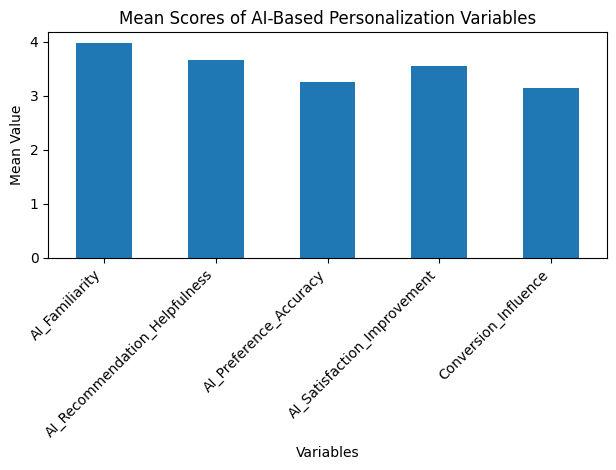

In [ ]:
import matplotlib.pyplot as plt

means = analysis_df.mean()

means.plot(kind='bar')
plt.title("Mean Scores of AI-Based Personalization Variables")
plt.ylabel("Mean Value")
plt.xlabel("Variables")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Interpretation**

The bar chart indicates that all AI-based personalization variables have mean values above the neutral midpoint, reflecting generally positive consumer perceptions toward AI-driven e-commerce features.

**CORRELATION HEATMAP**

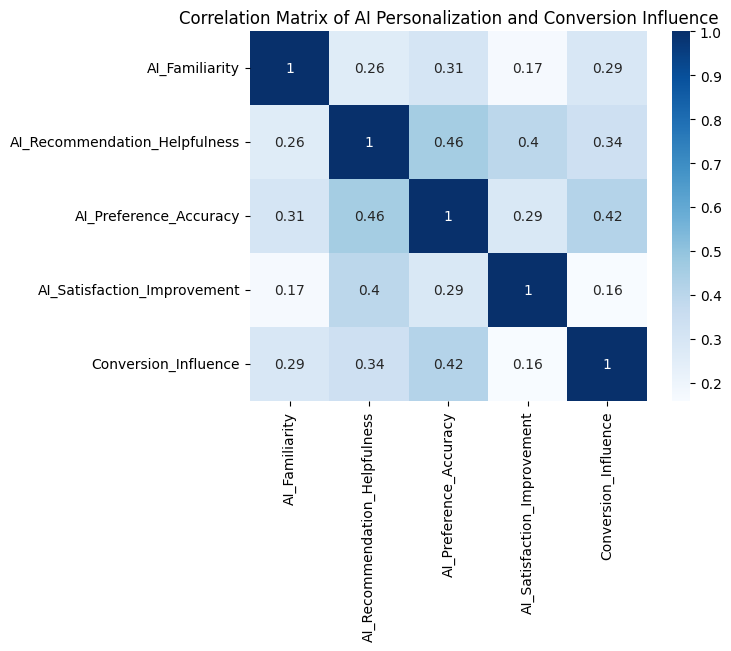

In [ ]:
import seaborn as sns

plt.figure()
sns.heatmap(analysis_df.corr(), annot=True, cmap="Blues")
plt.title("Correlation Matrix of AI Personalization and Conversion Influence")
plt.show()

**Interpretation**

The heatmap illustrates positive correlations between AI personalization variables and conversion influence, with recommendation helpfulness and preference accuracy showing stronger associations.

# **Regression Relationship Plots**

### **AI Recommendation Helpfulness vs Conversion**

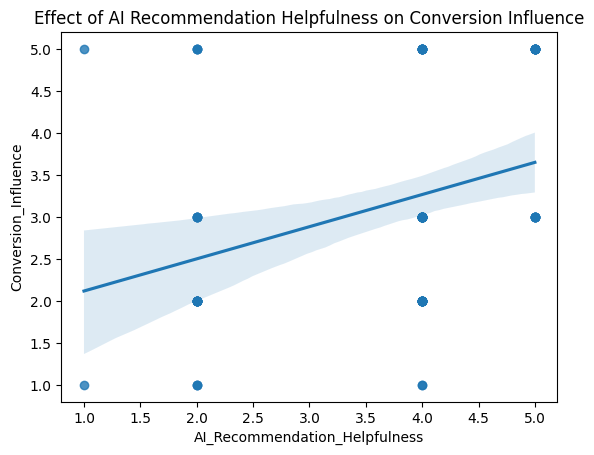

In [ ]:
sns.regplot(
    x="AI_Recommendation_Helpfulness",
    y="Conversion_Influence",
    data=analysis_df
)
plt.title("Effect of AI Recommendation Helpfulness on Conversion Influence")
plt.show()

**Why?**: Visually supports regression results.

**Interpretation**

The regression plot demonstrates a positive linear relationship between AI recommendation helpfulness and conversion influence, supporting the regression findings.

# **Boxplot**

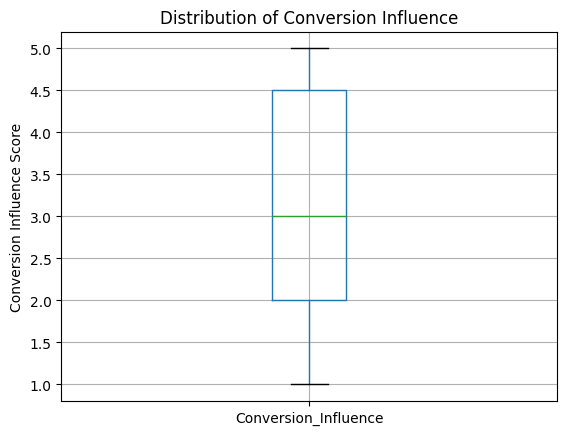

In [ ]:
analysis_df.boxplot(column="Conversion_Influence")
plt.title("Distribution of Conversion Influence")
plt.ylabel("Conversion Influence Score")
plt.show()

**Interpretation**

The boxplot indicates that the median conversion influence score is around the neutral to positive range, suggesting that AI-generated product recommendations moderately influence consumers’ buying decisions.

The interquartile range shows a reasonable spread of responses, while the absence of extreme outliers indicates consistency in respondents’ perceptions regarding the impact of AI-based personalization on conversion behavior.